## Room Pricing

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Preprocessing

In [157]:
df = pd.read_csv("raw_data.csv")
df.head()

,unit_name,bedroom,bathroom,beds,guests,type,unit_id,wifi,tv,cable_tv,...,room_name,booking_received_timestamp,booking_check_in,booking_check_out,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
0,Apartment - 1 Lantai 1,1,1.0,1.0,2.0,Bingin Ombak Apartment - 1 Lantai 1,UN1539,1,0,0,...,Bingin Ombak Apartment - 1 Lantai 1,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
1,Apartment - 2 Lantai 2,1,1.0,1.0,2.0,Bingin Ombak Apartment - 2 Lantai 2,UN1540,1,0,0,...,Bingin Ombak Apartment - 2 Lantai 2,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
2,Apartment - 2 Lantai 2,1,1.0,1.0,2.0,Bingin Ombak Apartment - 2 Lantai 2,UN1540,1,0,0,...,Bingin Ombak Apartment - 2 Lantai 2,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
3,Standard 2,1,2.0,1.0,2.0,Standard,UN1536,1,0,0,...,Standard (PLEASE IGNORE),2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
4,Standard 1,1,2.0,1.0,2.0,Standard,UN0165,1,0,0,...,Standard (PLEASE IGNORE),2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78010 entries, 0 to 78009
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unit_name                   78010 non-null  object 
 1   bedroom                     78010 non-null  int64  
 2   bathroom                    77920 non-null  float64
 3   beds                        77920 non-null  float64
 4   guests                      77920 non-null  float64
 5   type                        78010 non-null  object 
 6   unit_id                     78010 non-null  object 
 7   wifi                        78010 non-null  int64  
 8   tv                          78010 non-null  int64  
 9   cable_tv                    78010 non-null  int64  
 10  ac                          78010 non-null  int64  
 11  workspace                   78010 non-null  int64  
 12  essentials                  78010 non-null  int64  
 13  hot_water                   780

In [159]:
df.shape

(78010, 47)

In [160]:
df['unit_name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 78010 entries, 0 to 78009
Series name: unit_name
Non-Null Count  Dtype 
--------------  ----- 
78010 non-null  object
dtypes: object(1)
memory usage: 609.6+ KB




*   Kolom essentials isinya cuma 1 aja
*   List item



In [161]:
df['unit_name'].unique()

array(['Apartment - 1 Lantai 1', 'Apartment - 2 Lantai 2', 'Standard 2',
       'Standard 1', 'Standard 3', 'Standard 4', 'Room 06 (Downstairs)',
       'Room 05 (Downstairs)', 'Room 10 (Upstairs)', 'Room 09 (Upstairs)',
       'Room 08 (Upstairs)', 'Room 04 (Downstairs)',
       'Room 07 (Downstairs)', 'Me Villa A', 'E', 'C', 'B', 'D',
       'Room 01', 'Room 04', 'Room 12', 'Room 11', 'Room 03', 'Room 09',
       'Room 10', 'Room 02', 'Room 05', '224', '220', '101', '219', '222',
       '214', '215', '216', '218', '221', '217', '105', '106', '107',
       '104', 'Standard 4A', 'Standard 3A', 'Bungalow 2', 'Bungalow 3',
       'Bungalow 4', 'Bungalow 1', 'Room 4', 'Room 1',
       'Unit 5 (Upstairs)', 'Unit 4 (Upstairs)', 'Unit 3 (Upstairs)',
       'Unit 2 (Downstairs)', 'Unit 1 (Downstairs)', 'Bungalow 5',
       'Wooden 103', 'Pondok Lulik - Wooden 102 #T', 'Room 08 Downstairs',
       'Room 07 Downstairs', 'Room 19', 'Room 18', 'Room 09 Downstairs',
       'Room 10 Downstairs', 'R

In [162]:
df['room_name'].unique()

array(['Bingin Ombak Apartment - 1 Lantai 1',
       'Bingin Ombak Apartment - 2 Lantai 2', 'Standard (PLEASE IGNORE)',
       'Apartment 2 Lantai 2', 'Standard', 'Double A 2 BR',
       'Double A 5BR', '5BR', 'Downstairs/Upstairs', '2 BR', '2BR', '1BR',
       '4BR Downstairs Hot Water', 'Upstairs (Hot Water)',
       'Downstairs (Non Hot Water)', 'Upstairs (Non Hot Water)',
       'Downstairs (Hot Water)', '2BR Downstairs Hot Water',
       'Double No Balcony', 'Double Non Allocation',
       'Twin Non Allocation', 'Double with Balcony', 'Twin', 'Double',
       '3BR (Bung.D, Std D, Std T)', 'Bungalow 2BR',
       '3BR Bungalow Double', 'Standard Twin', 'Standard Double',
       'Bungalow 4BR', 'Bungalow Twin', 'Bungalow Double', 'Villa Damuh',
       'Bigger Type', 'Standard Type', 'Uluwatu Kayana Bungalows',
       'Wooden Twin', 'Bunk Bed', 'Deluxe', 'Standard Smaller (No Pool)',
       'Guesthouse', 'Room', 'NDBV Lot 6', 'Entire House', 'Studio',
       'Entire', 'Superior Twin',

In [163]:
df['type'].unique()

array(['Bingin Ombak Apartment - 1 Lantai 1',
       'Bingin Ombak Apartment - 2 Lantai 2', 'Standard',
       'Downstairs/Upstairs', '2BR', '1BR', 'Downstairs Hot Water',
       'Upstairs Hot Water', 'Downstairs Non Hot Water',
       'Upstairs Non Hot Water', 'Double No Balcony',
       'Double Non Allocation', 'Twin Non Allocation', 'Double Balcony',
       'Twin', 'Standard Twin', 'Standard Double', 'Bungalow Double',
       'Bungalow Twin', 'Villa Damuh', 'Bigger Type', 'Standard Type',
       'Uluwatu Kayana Bungalows', 'Wooden Twin', 'Deluxe', 'Bunk Bed',
       'Standard Smaller (No Pool)', 'Guesthouse', 'Room', 'NDBV Lot 6',
       'Entire House', 'Studio', 'Superior Double', 'Superior Twin',
       'Despacito Loft & Lounge - 6', 'Despacito Loft & Lounge - 1',
       'Despacito Loft & Lounge - 4', 'Despacito Loft & Lounge - 5',
       'Despacito Loft & Lounge - 2', 'Despacito Loft & Lounge - 3',
       'Kencana Homestay', 'Lumbung', 'Kamisama Joglo', 'Deluxe Double',
       'S

In [164]:
df.describe()

,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,workspace,essentials,...,property_bedrooms,lat,lng,distance_to_coastline,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
count,78010.000000,77920.000000,77920.000000,77920.000000,78010.000000,78010.000000,78010.000000,78010.000000,78010.000000,78010.0,...,78010.000000,77816.000000,77816.000000,45343.000000,78010.000000,78010.000000,72671.000000,77230.000000,7.801000e+04,7.801000e+04
mean,1.035137,1.054864,1.047857,2.086679,0.978823,0.532265,0.089796,0.974696,0.899282,1.0,...,13.234765,-8.761119,115.146185,670.379297,28.425099,3.539892,0.631665,4.404959,2.296312e+06,6.777725e+05
std,0.306131,0.383144,0.324730,0.522380,0.143974,0.498961,0.285891,0.157049,0.300957,0.0,...,7.730403,0.103751,0.388802,1414.130566,40.994812,3.830646,0.487256,0.942341,2.977614e+06,6.287251e+05
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.000000,-8.837896,110.360967,12.924400,-1.000000,1.000000,-1.000000,1.000000,-2.590644e+06,-2.590644e+06
25%,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0,...,6.000000,-8.822391,115.087110,65.860300,2.000000,2.000000,0.600000,4.000000,8.501970e+05,3.801168e+05
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,13.000000,-8.809038,115.113060,402.195000,12.000000,3.000000,0.900000,5.000000,1.463267e+06,5.001512e+05
75%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,22.000000,-8.678881,115.133906,761.362000,37.000000,4.000000,0.900000,5.000000,2.700462e+06,7.801720e+05
max,5.000000,5.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,27.000000,-7.728722,115.586846,14402.100000,333.000000,91.000000,1.000000,5.000000,6.137459e+07,1.003399e+07


### Cek Missing Value

In [165]:
df.isnull().sum()

unit_name                         0
bedroom                           0
bathroom                         90
beds                             90
guests                           90
type                              0
unit_id                           0
wifi                              0
tv                                0
cable_tv                          0
ac                                0
workspace                         0
essentials                        0
hot_water                         0
parking                           0
pool                              0
gym                               0
private_entrance                  0
luggage_drop_off                  0
hanger                            0
lock                              0
linens                            0
garden                            0
balcony                           0
kitchen                           0
breakfast                         0
heating                           0
washer                      

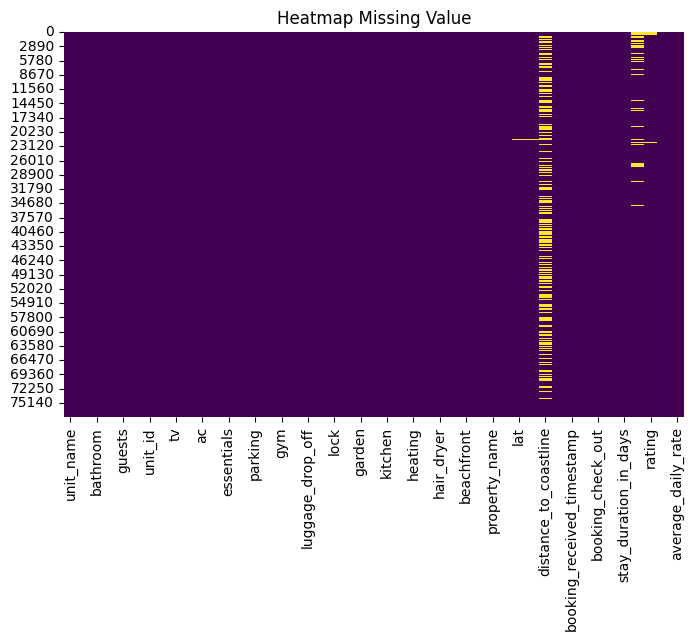

In [166]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [167]:
df.duplicated().sum()

17259

### Cek Outlier

In [168]:
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype != 'object':  # Periksa jika tipe data bukan string
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

In [169]:
outliers = detect_outliers_iqr(df)

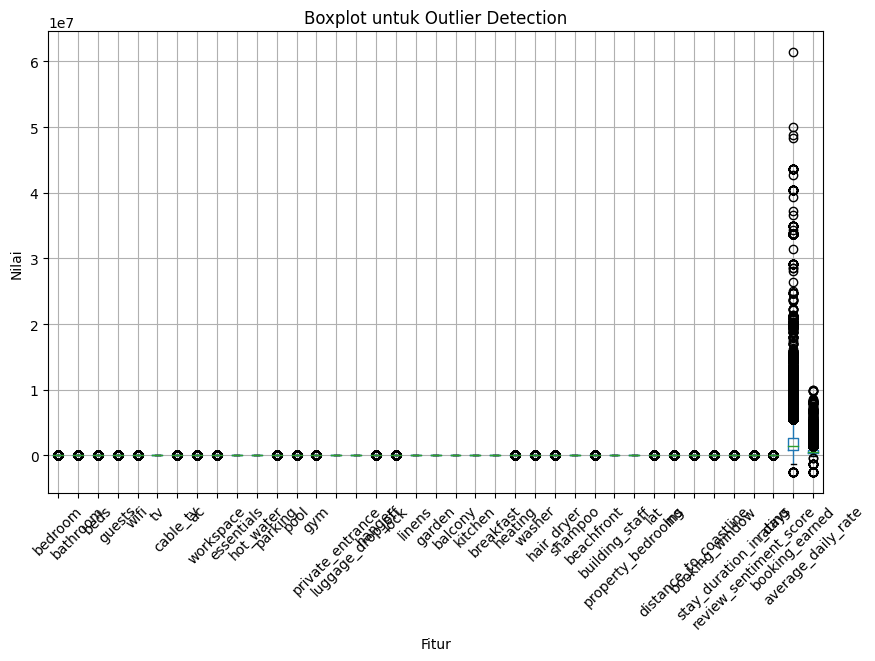

In [170]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot untuk Outlier Detection')
plt.ylabel('Nilai')
plt.xlabel('Fitur')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Cleaning Data

In [171]:
df.drop(columns=['booking_received_timestamp',	'booking_check_in', 'booking_check_out',
                 'essentials', 'unit_id', 'unit_name', 'type'], inplace=True)

In [172]:
df.drop(columns=['property_bedrooms'], inplace=True)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78010 entries, 0 to 78009
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bedroom                 78010 non-null  int64  
 1   bathroom                77920 non-null  float64
 2   beds                    77920 non-null  float64
 3   guests                  77920 non-null  float64
 4   wifi                    78010 non-null  int64  
 5   tv                      78010 non-null  int64  
 6   cable_tv                78010 non-null  int64  
 7   ac                      78010 non-null  int64  
 8   workspace               78010 non-null  int64  
 9   hot_water               78010 non-null  int64  
 10  parking                 78010 non-null  int64  
 11  pool                    78010 non-null  int64  
 12  gym                     78010 non-null  int64  
 13  private_entrance        78010 non-null  int64  
 14  luggage_drop_off        78010 non-null

In [175]:
df.head()

,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,workspace,hot_water,...,lat,lng,distance_to_coastline,room_name,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
0,1,1.0,1.0,2.0,1,0,0,1,1,1,...,-8.805646,115.113378,15.6035,Bingin Ombak Apartment - 1 Lantai 1,81,4,NaN,4.0,5911197.97,1.477799e+06
1,1,1.0,1.0,2.0,1,0,0,1,1,0,...,-8.805646,115.113378,15.6035,Bingin Ombak Apartment - 2 Lantai 2,81,4,NaN,4.0,5911197.97,1.477799e+06
2,1,1.0,1.0,2.0,1,0,0,1,1,0,...,-8.805646,115.113378,15.6035,Bingin Ombak Apartment - 2 Lantai 2,81,4,NaN,4.0,5911197.97,1.477799e+06
3,1,2.0,1.0,2.0,1,0,0,0,1,0,...,-8.805646,115.113378,15.6035,Standard (PLEASE IGNORE),81,4,NaN,4.0,5911197.97,1.477799e+06
4,1,2.0,1.0,2.0,1,0,0,0,1,0,...,-8.805646,115.113378,15.6035,Standard (PLEASE IGNORE),81,4,NaN,4.0,5911197.97,1.477799e+06


In [176]:
df.shape

(78010, 39)

In [177]:
mean_bathroom  = df['bathroom'].mean()
df['bathroom'].fillna(mean_bathroom, inplace=True)

In [178]:
mean_beds = df['beds'].mean()
df['beds'].fillna(mean_beds, inplace=True)

In [179]:
mean_guests = df['guests'].mean()
df['guests'].fillna(mean_guests, inplace=True)

In [180]:
mean_lat = df['lat'].mean()
df['lat'].fillna(mean_lat, inplace=True)

In [181]:
mean_lng = df['lng'].mean()
df['lng'].fillna(mean_lng, inplace=True)

In [182]:
mean_distance_to_coastline = df['distance_to_coastline'].mean()
df['distance_to_coastline'].fillna(mean_distance_to_coastline, inplace=True)

In [183]:
mean_review_sentiment_score = df['review_sentiment_score'].mean()
df['review_sentiment_score'].fillna(mean_review_sentiment_score, inplace=True)

In [184]:
mean_rating = df['rating'].mean()
df['rating'].fillna(mean_rating, inplace=True)

In [185]:
df.shape

(78010, 39)

In [186]:
df.drop_duplicates(inplace=True)

In [187]:
df.shape

(50728, 39)

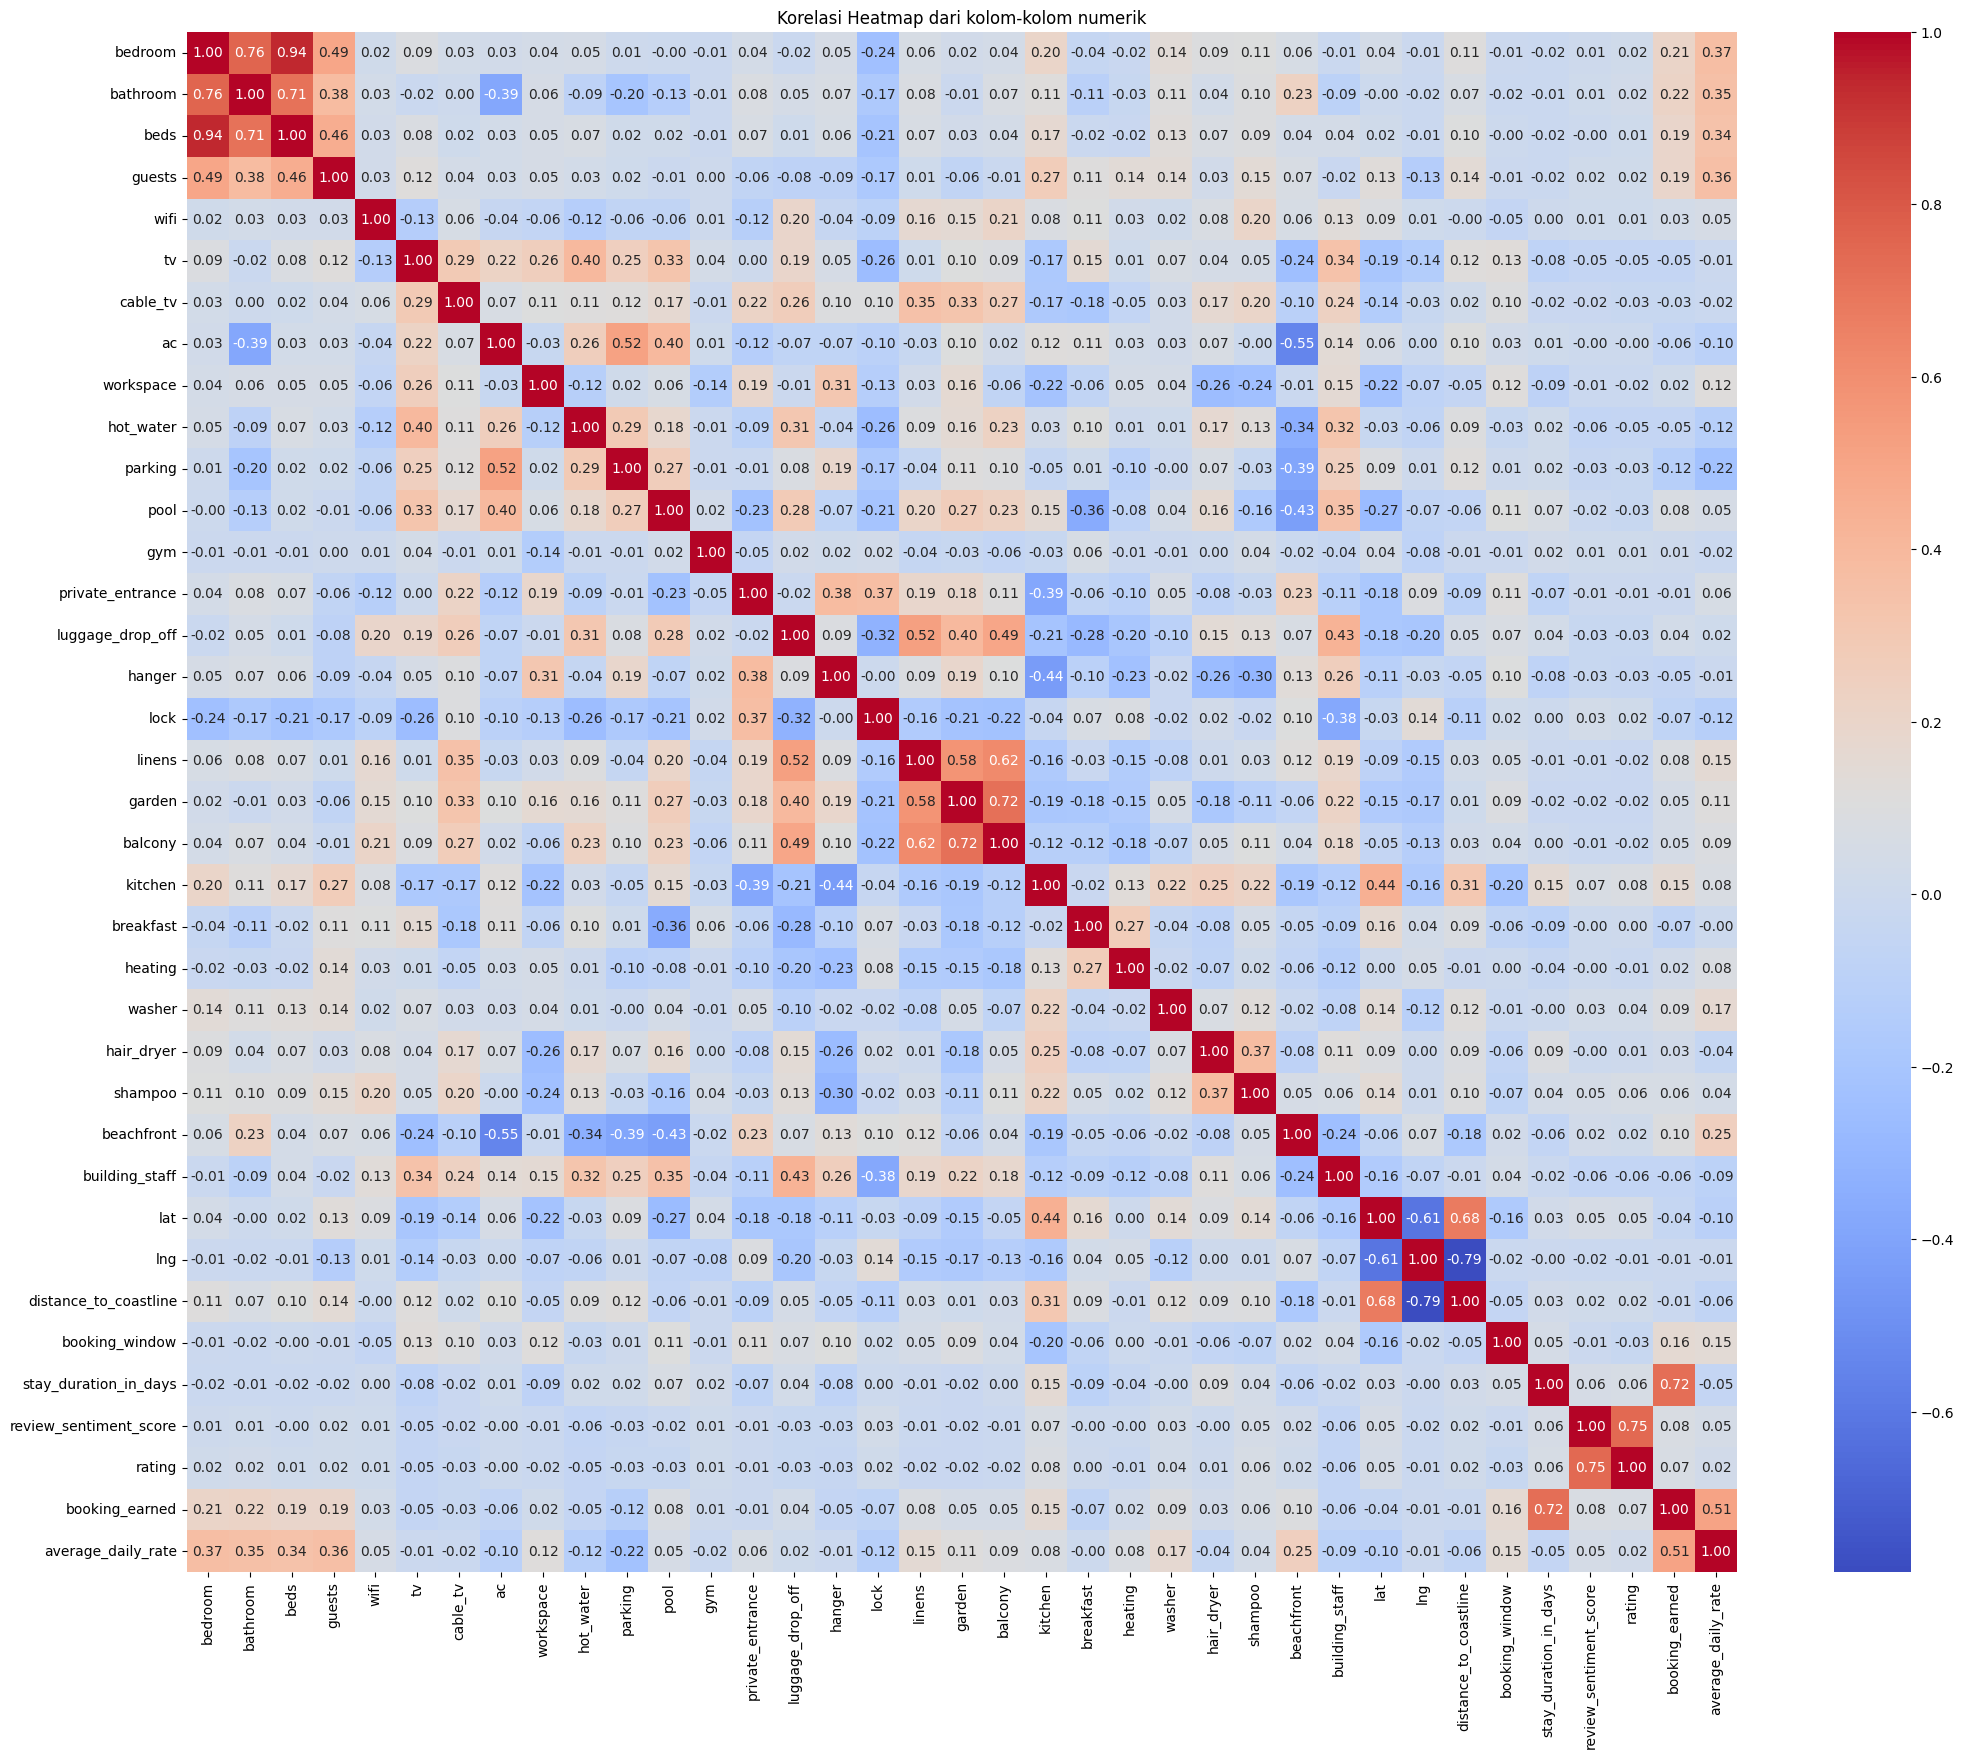

In [188]:
numeric_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(25,20))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Heatmap dari kolom-kolom numerik')
plt.show()